# Numerical vs. Symbolic computation

In [1]:
# numerical computation
# ex01

a= 1/3
b= 2/3

a, b, a+b, (a+b-b)

(0.3333333333333333, 0.6666666666666666, 1.0, 0.33333333333333337)

In [2]:
(a+b-b) == a  # this is False !!!

False

In [3]:
import math
math.isclose((a+b-b), a)  # 除非你覺得 "isclose" is enough!!

True

In [4]:
#math.isclose?
# Signature: math.isclose(a, b, *, 【rel_tol=1e-09】, abs_tol=0.0)

In [5]:
# ex02
a= 2
b= 3
c= (a**.5) / (b**.5)
d= (a/b)**.5
c, d, c==d

(0.8164965809277261, 0.816496580927726, False)

In [6]:
# 檢查一下誤差之百分比，的確很小啦！
error= (c-d)/c
error

1.3597399555105182e-16

In [7]:
# 但有沒有改善空間，有！
# 增加電腦的位元數 16bit --> 32 bit -->64 bit -->128 bit ->???
# 還有沒有其他可能性？ 
# ===> Symbolic Computation

import sympy
a= sympy.Integer(2)
b= sympy.Integer(3)
a, b

(2, 3)

In [8]:
c= sympy.sqrt(a)/sympy.sqrt(b)
c

sqrt(6)/3

In [9]:
d= sympy.sqrt(a/b)
d

sqrt(6)/3

In [10]:
c==d

True

# A More Interesting Example
- https://docs.sympy.org/latest/tutorial/intro.html#what-is-symbolic-computation

In [11]:
x= sympy.symbols('x')
x

x

In [12]:
#x??

#Type:        Symbol
#String form: x


In [13]:
f= 1 + x + x**2  # 多項式 表示式 (expression)
f

x**2 + x + 1

In [14]:
f+f  # 表示式 (expression) 的相加

2*x**2 + 2*x + 2

In [15]:
f*f # 表示式 (expression) 的相乘

(x**2 + x + 1)**2

In [16]:
f**3  # 表示式 (expression) 的乘冪

(x**2 + x + 1)**3

In [17]:
(f**3).expand() # 表示式 (expression) 的展開

x**6 + 3*x**5 + 6*x**4 + 7*x**3 + 6*x**2 + 3*x + 1

In [18]:
g= (f**3).expand() # 表示式 (expression) 的因式分解
g.factor()

(x**2 + x + 1)**3

In [19]:
f

x**2 + x + 1

In [20]:
f.diff(x) # 表示式 (expression) 的微分

2*x + 1

In [21]:
f.integrate(x) # 表示式 (expression) 的積分

x**3/3 + x**2/2 + x

In [22]:
f.integrate((x,0,10)) # 表示式 (expression) 的定積分

1180/3

In [23]:
f.subs(x,10)  # 表示式 (expression) 的變數替換 (代入)

111

In [24]:
# 運用 變數替換 (代入)，來驗算定積分
F= f.integrate(x)
F.subs(x,10) - F.subs(x,0)

1180/3

In [25]:
F.subs(x,10) - F.subs(x,0) == f.integrate((x,0,10))

True

In [26]:
# 極限
sympy.limit(f, x, 10)

111

In [27]:
sympy.limit(f, x, sympy.oo)

oo

In [28]:
# 再測試一下其他較有趣的極限運算
# ex01

f1= (x**2 -x -2)/(x+1)
f1

(x**2 - x - 2)/(x + 1)

In [29]:
f1.subs(x,-1)

nan

In [30]:
f2= f1.simplify()
f2

x - 2

In [31]:
f2.subs(x,-1)

-3

In [32]:
sympy.limit(f1, x, -1)

-3

In [33]:
# ex03
x, n= sympy.symbols('x, n')
f3= (1+x/n)**n
f3

(1 + x/n)**n

In [34]:
sympy.limit(f3, n, sympy.oo)

exp(x)

In [35]:
# ex04
θ= sympy.symbols('θ')
f4= sympy.sin(θ) / θ
f4

sin(θ)/θ

In [36]:
sympy.limit(f4, θ, 0)

1

In [37]:
# ex 5
x, dx= sympy.symbols('x, dx')
f= sympy.Function('f')

q= sympy.limit((f(x+dx)-f(x))/dx, dx,0)
q

Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x)

In [38]:
f(x).diff(x)

Derivative(f(x), x)

In [39]:
q.simplify() == f(x).diff(x)

True

In [40]:
# ex6
# 再走深入一點
def h(x):
    y = 1 + x + x**2
    return y
h(x)

x**2 + x + 1

In [41]:
h(x+dx)

dx + x + (dx + x)**2 + 1

In [42]:
(h(x+dx) - h(x))/dx

(dx - x**2 + (dx + x)**2)/dx

In [43]:
sympy.limit(
    (h(x+dx) - h(x))/dx, 
    dx, 0)


2*x + 1

In [44]:
h(x).diff(x)

2*x + 1

In [45]:
sympy.limit(
    (h(x+dx) - h(x))/dx, 
    dx, 0
) == h(x).diff(x)

True

In [46]:
# ex07
def mySin(x):
    y= sympy.sin(x)
    return y
mySin(x)

sin(x)

In [47]:
mySin(x+dx)

sin(dx + x)

In [48]:
sympy.limit(
    (mySin(x+dx)-mySin(x))/dx, 
    dx, 0)


cos(x)

In [49]:
mySin(x).diff(x)

cos(x)

In [50]:
# ex08
# 自己出些題目，自己練習

In [51]:
# 解方程式
# x**2 + x - 2 ==0
# x = ?

eq= x**2 + x - 2

解= sympy.solve(eq, x)
解

[-2, 1]

In [52]:
#驗算
eq.subs(x, 解[0]) == 0

True

In [53]:
eq.subs(x, 解[1]) == 0

True

In [54]:
# 矩陣運算
A= [[2,1], [1,3]]
A= sympy.Matrix(A)
A

Matrix([
[2, 1],
[1, 3]])

In [55]:
A+A

Matrix([
[4, 2],
[2, 6]])

In [56]:
A*10

Matrix([
[20, 10],
[10, 30]])

In [57]:
A*A

Matrix([
[5,  5],
[5, 10]])

In [58]:
A.det()

5

In [59]:
A.inv()

Matrix([
[ 3/5, -1/5],
[-1/5,  2/5]])

In [60]:
A**(-1)

Matrix([
[ 3/5, -1/5],
[-1/5,  2/5]])

In [61]:
A**(-1) * A

Matrix([
[1, 0],
[0, 1]])

In [62]:
A.eigenvals()

{5/2 - sqrt(5)/2: 1, sqrt(5)/2 + 5/2: 1}

In [63]:
A.eigenvects()

[(5/2 - sqrt(5)/2,
  1,
  [Matrix([
   [-sqrt(5)/2 - 1/2],
   [               1]])]),
 (sqrt(5)/2 + 5/2,
  1,
  [Matrix([
   [-1/2 + sqrt(5)/2],
   [               1]])])]

In [64]:
P, D= A.diagonalize()
P

Matrix([
[-sqrt(5)/2 - 1/2, -1/2 + sqrt(5)/2],
[               1,                1]])

In [65]:
D

Matrix([
[5/2 - sqrt(5)/2,               0],
[              0, sqrt(5)/2 + 5/2]])

In [66]:
P * D * P**(-1)

Matrix([
[(5/2 - sqrt(5)/2)*(-sqrt(5) - 1)*(-sqrt(5)/2 - 1/2)/(sqrt(5) + 5) + sqrt(5)*(-1/2 + sqrt(5)/2)*(sqrt(5)/2 + 5/2)/5, (5/2 - sqrt(5)/2)*(-sqrt(5)/2 - 1/2)/(sqrt(5)/2 + 5/2) + (-1/2 + sqrt(5)/2)*(sqrt(5)/10 + 1/2)*(sqrt(5)/2 + 5/2)],
[                                      (5/2 - sqrt(5)/2)*(-sqrt(5) - 1)/(sqrt(5) + 5) + sqrt(5)*(sqrt(5)/2 + 5/2)/5,                                       (5/2 - sqrt(5)/2)/(sqrt(5)/2 + 5/2) + (sqrt(5)/10 + 1/2)*(sqrt(5)/2 + 5/2)]])

In [67]:
P * D * P**(-1) == A

False

In [68]:
(P * D * P**(-1)).evalf()

Matrix([
[2.0, 1.0],
[1.0, 3.0]])

In [69]:
(P * D * P**(-1)).evalf() == A

True

# 解微分方程式 ， 這個我之前沒試過，這裡是第一次嘗試、、、、
## Solve the differential equation

$
f= f(x)
\\
f" - f = e^x
\\
f(x) = ?
$

In [70]:
f= sympy.Function('f')
f

f

In [71]:
eq= sympy.Eq(
    f(x).diff(x).diff(x)-f(x), 
    sympy.exp(x)
)
eq

Eq(-f(x) + Derivative(f(x), (x, 2)), exp(x))

In [72]:
解= sympy.dsolve(eq, f(x))
解

Eq(f(x), C2*exp(-x) + (C1 + x/2)*exp(x))

In [73]:
# 驚！！！
解

Eq(f(x), C2*exp(-x) + (C1 + x/2)*exp(x))

In [74]:
print(解)

Eq(f(x), C2*exp(-x) + (C1 + x/2)*exp(x))


In [75]:
sympy.latex(解)

'f{\\left(x \\right)} = C_{2} e^{- x} + \\left(C_{1} + \\frac{x}{2}\\right) e^{x}'

In [76]:
# 驗算
# 如何撈出 解 中的 函數？？ 還不知！
# 可先自己手動打入

c1, c2, x= sympy.symbols('c1, c2, x')

f解= c2 * sympy.exp(-x) + (c1 + x/2) * sympy.exp(x)
左=  f解.diff(x).diff(x) - f解
右=  sympy.exp(x)

左 == 右

True

In [77]:
# 再研究一下如何自動 從 自動得出的 【解】 之中撈出可用的 物件 出來驗算，不用自己眼睛來看過才手打出來。
q= 解.rhs
q

C2*exp(-x) + (C1 + x/2)*exp(x)

In [78]:
左= q.diff(x).diff(x)-q
右=  sympy.exp(x)
左 == 右

True

In [79]:
#解??

In [80]:
# 牛頓運動方程式
# a(t)  == -9.8
# v'(t) == -9.8
# s"(t) == -9.8
# s"(t) + 9.8 == 0

# s(t) == ?

t= sympy.symbols('t')
s= sympy.Function('s')
s0, v0= sympy.symbols('s0, v0')

eq= s(t).diff(t).diff(t) + 9.8

解= sympy.dsolve(eq, s(t))
解

Eq(s(t), C1 + C2*t - 49*t**2/10)

In [81]:
print(解.rhs)

C1 + C2*t - 49*t**2/10


In [82]:
# 增加初始條件 at t=0, s= s0, v= s'= v0
s= 解.rhs
v= s.diff(t)
s

C1 + C2*t - 49*t**2/10

In [83]:
v

C2 - 49*t/5

In [84]:
C1, C2= sympy.symbols('C1, C2')

In [85]:
# 運用 v== v0 at t=0 來解 C2

c2= sympy.solve(
    v.subs(t,0)-v0, 
    C2)
c2= c2[0]
c2

v0

In [86]:
# 運用 s== s0 at t=0 來解 C1
c1= sympy.solve(
    s.subs(t,0).subs(C2,c2)-s0, 
    C1)
c1= c1[0]
c1

s0

In [87]:
s

C1 + C2*t - 49*t**2/10

In [88]:
sFinal= s.subs(C1,c1).subs(C2,c2)
sFinal

s0 - 49*t**2/10 + t*v0

In [89]:
# ex10: 運用積分計算圓形面積

# x**2 + y**2 ==1
# y**2 = 1 - x**2

# y1= +sqrt(1-x**2) # 上半圓
# y2= -sqrt(1-x**2) # 下半圓
# 

# x= -1, ... +1



In [90]:
x,y = sympy.symbols('x,y')
y1= sympy.sqrt(1-x**2)
y2= -y1
y1

sqrt(1 - x**2)

In [91]:
y2

-sqrt(1 - x**2)

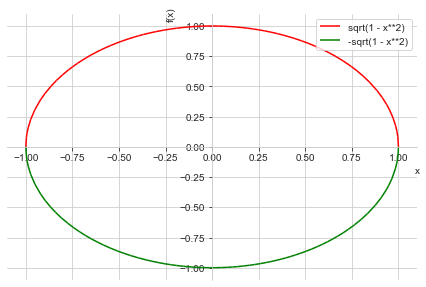

In [92]:
import seaborn as sb
sb.set_style('whitegrid')

p= sympy.plotting.plot(y1,y2,(x,-1,1), show=False)
p[0].line_color='red'
p[1].line_color='green'
p.legend=True
p.show()

In [93]:
y1.integrate((x,-1,1))  # 上半圓

pi/2

In [94]:
y2.integrate((x,-1,1)) # 下半圓  
#(會有 負號，那是因為 y2 整個在 x軸下方，函數值都是負值的緣故)

-pi/2

In [95]:
圓面積= y1.integrate((x,-1,1)) * 2  #只取上半圓 * 2 即可
圓面積

pi

In [96]:
# sympy.Eq

sympy.Eq(
    (x+y)**2,
    x**2+2*x*y+y**2)

Eq((x + y)**2, x**2 + 2*x*y + y**2)

In [97]:
sympy.Eq(
    ((x+y)**2).expand(),
    x**2+2*x*y+y**2)

True

In [98]:
r= sympy.symbols('r:10')
'''
eq= 1
for i in range(len(r)):
    eq *= (x-r[i])
'''
eq= (x-r[0])*(x-r[1])*(x-r[2])
    
eq= eq.expand()
display(eq)

解= sympy.solve(
    eq, 
    x)
解

-r0*r1*r2 + r0*r1*x + r0*r2*x - r0*x**2 + r1*r2*x - r1*x**2 - r2*x**2 + x**3

[r0, r1, r2]

In [99]:
eq.factor()

(-r0 + x)*(-r1 + x)*(-r2 + x)

In [100]:
eq.simplify()

-r0*r1*r2 + r0*r1*x + r0*r2*x - r0*x**2 + r1*r2*x - r1*x**2 - r2*x**2 + x**3

In [101]:
sympy.Poly(eq)

Poly(x**3 - x**2*r0 - x**2*r1 - x**2*r2 + x*r0*r1 + x*r0*r2 + x*r1*r2 - r0*r1*r2, x, r0, r1, r2, domain='ZZ')

In [102]:
# 另類物件了....
# leave to you if you feel interested in more detail....

In [103]:
# 多重積分，延續 計算 圓面積，這回我們來算 球體積...
# x**2 + y**2 + z**2 =1
# z= sqrt(1- x**2 -y**2)
x,y,z= sympy.symbols('x,y,z')

z= sympy.sqrt(1-x**2-y**2)
z= 1-x**2-y**2
z

-x**2 - y**2 + 1

In [104]:
# 畫圖 3d，為了 互動操作...

%matplotlib qt


In [105]:
title= f'z= $\\pm$ ${sympy.latex(z)}$'

sympy.plotting.plot3d(
    z, 
    #-z, 
    (x,-1,1),
    (y,-1,1),
    xlabel='x',
    ylabel='y',
    title= f'{title}'
)


- Latex 正負號
$
\pm
$

In [106]:
z

-x**2 - y**2 + 1

In [107]:
'''
z.integrate(
    (y, -sympy.sqrt(1-x**2), sympy.sqrt(1-x**2)),
    (x,-1,1)
)
'''
# 這樣積不出來！！

'\nz.integrate(\n    (y, -sympy.sqrt(1-x**2), sympy.sqrt(1-x**2)),\n    (x,-1,1)\n)\n'

In [108]:
sympy.integrate(1-x**2-y**2,
                (x,-sympy.sqrt(1-y**2),sympy.sqrt(1-y**2)),
                (y,-1,1))

pi/2

In [109]:
import sympy as sm
x, y, z, r, θ, ϕ, R= sm.symbols('x,y,z, r, θ, ϕ, R')

In [110]:
z= sm.sqrt(1-x**2-y**2)
z

sqrt(-x**2 - y**2 + 1)

In [111]:
'''
sm.integrate(
    1, 
     (x,0,sm.sqrt(1-y**2-z**2)),
     (y,0,sm.sqrt(1-z**2)),
     (z,0,1)
)
'''
# 很難積
# 開始進入深水區！！！


'\nsm.integrate(\n    1, \n     (x,0,sm.sqrt(1-y**2-z**2)),\n     (y,0,sm.sqrt(1-z**2)),\n     (z,0,1)\n)\n'

In [112]:
sm.integrate(
     
     r**2*sm.cos(ϕ),  # 神奇的 直角坐標 vs 球座標 轉換
    
     (ϕ, -sm.pi/2, sm.pi/2),
     (θ, 0, sm.pi*2),
     (r, 0, R)
)

4*pi*R**3/3

In [113]:
# 球座標 vs xyz 座標
import sympy as sm
x, y, z, r, θ, ϕ= sm.symbols('x,y,z, r, θ, ϕ')

x= r * sm.cos(ϕ) * sm.cos(θ)
y= r * sm.cos(ϕ) * sm.sin(θ)
z= r * sm.sin(ϕ)

# ϕ= 0 @赤道
# ϕ= π/2 @北極
# ϕ= -π/2 @南極
# 以上是自推


#-------------
# 以下來自 wikipedia
# 另類定義
# ϕ= 0   @北極
# ϕ= π/2 @赤道
# ϕ= π   @南極
## https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant#Example_3:_spherical-Cartesian_transformation

# 下面計算是自推的。。初步看來正確但仍有待深入研究，這裡是深水區，我年輕時沒搞懂，因此一直覺得自己微積分沒學好！



In [114]:
# The Jacobian matrix

J= [
 [x.diff(r), x.diff(θ), x.diff(ϕ)],
 [y.diff(r), y.diff(θ), y.diff(ϕ)],
 [z.diff(r), z.diff(θ), z.diff(ϕ)]]
J= sm.Matrix(J)
J


Matrix([
[cos(θ)*cos(ϕ), -r*sin(θ)*cos(ϕ), -r*sin(ϕ)*cos(θ)],
[sin(θ)*cos(ϕ),  r*cos(θ)*cos(ϕ), -r*sin(θ)*sin(ϕ)],
[       sin(ϕ),                0,         r*cos(ϕ)]])

In [115]:
J.det().simplify()

r**2*cos(ϕ)

In [116]:
J.jacobian?

Signature: J.jacobian(X)
Docstring:
Calculates the Jacobian matrix (derivative of a vector-valued function).

Parameters

``self`` : vector of expressions representing functions f_i(x_1, ..., x_n).
X : set of x_i's in order, it can be a list or a Matrix

Both ``self`` and X can be a row or a column matrix in any order
(i.e., jacobian() should always work).

Examples

>>> from sympy import sin, cos, Matrix
>>> from sympy.abc import rho, phi
>>> X = Matrix([rho*cos(phi), rho*sin(phi), rho**2])
>>> Y = Matrix([rho, phi])
>>> X.jacobian(Y)
Matrix([
[cos(phi), -rho*sin(phi)],
[sin(phi),  rho*cos(phi)],
[   2*rho,             0]])
>>> X = Matrix([rho*cos(phi), rho*sin(phi)])
>>> X.jacobian(Y)
Matrix([
[cos(phi), -rho*sin(phi)],
[sin(phi),  rho*cos(phi)]])

See Also

hessian
wronskian
File:      d:\anaconda3-2021.05\lib\site-packages\sympy\matrices\matrices.py
Type:      method
